Universidad Torcuato Di Tella

Licenciatura en Tecnología Digital\
**Tecnología Digital VI: Inteligencia Artificial**

# **Pandas**

Por convención, el alias elegido para Pandas es `pd`.

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.4.4'

En este caso, la versión que se usa en el libro de VanderPlas, citado en las diapositivas, también es un poco anterior: '1.3.5' (p. 100).

### **Estructuras de datos**

##### **`Series`**

Consiste en una matriz unidimensional de datos indexados.

In [3]:
datos = pd.Series([0.25, 0.5, 0.75, 1.0])
datos

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

<img src="https://paulvanderlaken.files.wordpress.com/2020/08/image-2.png?w=1024" alt="de" width="600"/>

In [4]:
datos.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
datos.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
datos[1]

0.5

In [7]:
datos[1:3]

1    0.50
2    0.75
dtype: float64

Parece similar a una matriz unidimensional de NumPy. Pero, la diferencia esencial es que, en tanto que la matriz de NumPy tiene un índice *entero implícitamente definido* para acceder a los valores, la `Series` de Pandas tiene un índice *explícitamente definido* que *no necesariamente* tiene que ser *entero*.

In [8]:
datos = pd.Series([0.25, 0.5, 0.75, 1.0],
                  index = ['a', 'b', 'c', 'd'])
datos

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
datos['b']

0.5

Se puede construir una `Series` desde una lista, como hicimos hasta ahora, o desde un diccionario o, incluso, desde un escalar.

In [10]:
poblacion_dict = {'California': 39538223,
                   'Texas': 29145505,
                   'Florida': 21538187,
                   'New York': 20201249,
                   'Pennsylvania': 13002700}
poblacion = pd.Series(poblacion_dict)
poblacion

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

In [11]:
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

##### **`DataFrame`**

In [12]:
area_dict = {'California': 423967,
             'Texas': 695662,
             'Florida': 170312,
             'New York': 141297,
             'Pennsylvania': 119280}
area = pd.Series(area_dict)
area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
dtype: int64

In [13]:
estados = pd.DataFrame({'poblacion': poblacion,
                        'area': area})
estados

,poblacion,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [14]:
estados.index

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'], dtype='object')

In [15]:
estados.columns

Index(['poblacion', 'area'], dtype='object')

In [16]:
estados['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

##### **`Index`**

Corresponde al índice explícito que nos permite referenciar y modificar datos. Puede ser considerado como una matriz inmutable o un conjunto ordenado.

In [17]:
indices = pd.Index([2, 3, 5, 7, 11])
indices

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [18]:
indices[1]

3

In [19]:
indices[::2]

Int64Index([2, 5, 11], dtype='int64')

In [20]:
indices_a = pd.Index([1, 3, 5, 7, 9])
indices_b = pd.Index([2, 3, 5, 7, 11])
indices_a.intersection(indices_b)

Int64Index([3, 5, 7], dtype='int64')

In [21]:
indices_a.union(indices_b)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [22]:
indices_a.symmetric_difference(indices_b)

Int64Index([1, 2, 9, 11], dtype='int64')

### **Indexación y selección de datos**

##### **En `Series`**

In [23]:
datos

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [24]:
'a' in datos

True

In [25]:
datos.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [26]:
list(datos.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [27]:
datos['e'] = 1.25
datos

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [28]:
datos['a':'c'] # ¡El último incluido!

a    0.25
b    0.50
c    0.75
dtype: float64

In [29]:
datos[:2] # Acá, el último ya no incluido.

a    0.25
b    0.50
dtype: float64

In [30]:
datos[(datos > 0.3) & (datos < 0.8)] # Como con máscaras en NumPy.

b    0.50
c    0.75
dtype: float64

In [31]:
datos[['a', 'e']] # Como la indexación elegante en NumPy.

a    0.25
e    1.25
dtype: float64

Ante los siguientes datos, puede ocurrir la siguiente confusión.

In [32]:
datos = pd.Series(['a', 'b', 'c'], index = [1, 3, 5])
datos

1    a
3    b
5    c
dtype: object

In [33]:
datos[1]

'a'

In [34]:
datos[1:3]

3    b
5    c
dtype: object

Para resolver esta confusión, están `loc` e `iloc` disponibles.

El atributo `loc` permite indexar y obtener porciones haciendo referencia siempre al índice *explícito*.

En cambio, el atributo `iloc` permite indexar y obtener porciones haciendo referencia siempre al índice *implícito*.

In [35]:
datos.loc[1]

'a'

In [36]:
datos.loc[1:3]

1    a
3    b
dtype: object

In [37]:
datos.iloc[1]

'b'

In [38]:
datos.iloc[1:3]

3    b
5    c
dtype: object

##### **En `DataFrame`**

In [39]:
estados

,poblacion,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [40]:
estados['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [41]:
estados.area # Alternativa, PERO no siempre funciona (por ejemplo, si el nombre de la columna no es un string o si está en conflicto con un método de DataFrame).

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [42]:
estados.iloc[:3, :2]

,poblacion,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312


In [43]:
estados.loc[:'Florida', :'area'] # Alternativa.

,poblacion,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312


In [44]:
estados.loc[estados['poblacion'] > 25000000]

,poblacion,area
California,39538223,423967
Texas,29145505,695662


In [45]:
estados.loc[estados['poblacion'] > 25000000, ['area']]

,area
California,423967
Texas,695662


In [46]:
estados.query('poblacion > 25000000')[['area']] # Alternativa.

,area
California,423967
Texas,695662


In [47]:
estados['densidad'] = estados['poblacion'] / estados['area']
estados

,poblacion,area,densidad
California,39538223,423967,93.257784
Texas,29145505,695662,41.896072
Florida,21538187,170312,126.463121
New York,20201249,141297,142.970120
Pennsylvania,13002700,119280,109.009893


In [48]:
estados.pop('densidad')
estados

,poblacion,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [49]:
estados.eval('densidad = poblacion / area', inplace = True) # Alternativa.
estados

,poblacion,area,densidad
California,39538223,423967,93.257784
Texas,29145505,695662,41.896072
Florida,21538187,170312,126.463121
New York,20201249,141297,142.970120
Pennsylvania,13002700,119280,109.009893


In [50]:
estados.values

array([[3.95382230e+07, 4.23967000e+05, 9.32577842e+01],
       [2.91455050e+07, 6.95662000e+05, 4.18960717e+01],
       [2.15381870e+07, 1.70312000e+05, 1.26463121e+02],
       [2.02012490e+07, 1.41297000e+05, 1.42970120e+02],
       [1.30027000e+07, 1.19280000e+05, 1.09009893e+02]])

In [51]:
estados.T

,California,Texas,Florida,New York,Pennsylvania
poblacion,3.953822e+07,2.914550e+07,2.153819e+07,2.020125e+07,1.300270e+07
area,4.239670e+05,6.956620e+05,1.703120e+05,1.412970e+05,1.192800e+05
densidad,9.325778e+01,4.189607e+01,1.264631e+02,1.429701e+02,1.090099e+02


##### **Múltiples índices**

In [52]:
indices = [('California', 2010), ('California', 2020),
           ('Texas', 2010), ('Texas', 2020),
           ('New York', 2010), ('New York', 2020)]
poblaciones = [37253956, 39538223,
               25145561, 29145505,
               19378102, 20201249]
indices = pd.MultiIndex.from_tuples(indices)
pop = pd.Series(poblaciones, index = indices)
pop

California  2010    37253956
            2020    39538223
Texas       2010    25145561
            2020    29145505
New York    2010    19378102
            2020    20201249
dtype: int64

In [53]:
pop[:, 2020]

California    39538223
Texas         29145505
New York      20201249
dtype: int64

In [54]:
pop.unstack() # Opuesto: stack().

,2010,2020
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


In [55]:
pop.index.names

FrozenList([None, None])

In [56]:
pop.index.names = ['estado', 'tiempo']
pop.index.names

FrozenList(['estado', 'tiempo'])

In [57]:
pop

estado      tiempo
California  2010      37253956
            2020      39538223
Texas       2010      25145561
            2020      29145505
New York    2010      19378102
            2020      20201249
dtype: int64

In [58]:
pop.sort_index()

estado      tiempo
California  2010      37253956
            2020      39538223
New York    2010      19378102
            2020      20201249
Texas       2010      25145561
            2020      29145505
dtype: int64

In [59]:
pop.reset_index(name = 'poblacion')

,estado,tiempo,poblacion
0,California,2010,37253956
1,California,2020,39538223
2,Texas,2010,25145561
3,Texas,2020,29145505
4,New York,2010,19378102
5,New York,2020,20201249


In [60]:
pop.reset_index(name = 'poblacion').set_index(['estado', 'tiempo'])

poblacion
estado     tiempo           
California 2010     37253956
           2020     39538223
Texas      2010     25145561
           2020     29145505
New York   2010     19378102
           2020     20201249

### **Operaciones sobre datos**

Pandas está diseñado para que funcione con NumPy. Entonces, cualquier método de NumPy que vimos (como `np.exp()` o `np.sin()`) funcionan con objetos `Series` o `DataFrame` de Pandas.

El correspondiente método en Pandas para los siguientes operadores de Python son (siguiendo el formato: operador | método):

* \+ | `add()`.

* \- | `sub()` o `subtract()`.
* \* | `mul()` o `multiply()`.
* /  | `truediv()`, `div()` o `divide()`.
* // | `floordiv()`.
* %  | `mod()`.
* ** | `pow()`.

### **Manejo de datos perdidos**

Cuando figura `None`, dado que Python no soporta operaciones aritméticas con dicho valor, agregaciones como `sum` o `min` usualmente conducen a un error.

Es por ese motivo que Pandas no usa `None` en matrices numéricas, sino que usa `NaN` (por *Not a Number*). Sin importar cuál sea la operación, el resultado de la aritmética con `NaN` será otro `NaN`.

In [61]:
import numpy as np
datos = pd.Series([1, np.nan, 'hola', None])
datos

0       1
1     NaN
2    hola
3    None
dtype: object

In [62]:
datos.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [63]:
datos[datos.notnull()]

0       1
2    hola
dtype: object

In [64]:
datos.dropna() # Alternativa.

0       1
2    hola
dtype: object

In [65]:
otros_datos = pd.Series([1, np.nan, 2, None, 3])
otros_datos

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

In [66]:
otros_datos.fillna(otros_datos.mean()) # Ojo que imputar la media tiene sus desventajas.

0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
dtype: float64

### **Combinación de bases de datos**

##### **`concat`**

In [67]:
serie_1 = pd.Series(['A', 'B', 'C'], index = [1, 2, 3])
serie_2 = pd.Series(['D', 'E', 'F'], index = [4, 5, 6])
pd.concat([serie_1, serie_2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [68]:
pd.concat([serie_1, serie_2], axis = 'columns')

,0,1
1,A,NaN
2,B,NaN
3,C,NaN
4,NaN,D
5,NaN,E
6,NaN,F


In [69]:
serie_2.index = serie_1.index
pd.concat([serie_1, serie_2], axis = 'columns')

,0,1
1,A,D
2,B,E
3,C,F


In [70]:
df1 = pd.DataFrame({'A': [1, 2],
                    'B': [3, 4],
                    'C': [5, 6]})
df1

,A,B,C
0,1,3,5
1,2,4,6


In [71]:
df2 = pd.DataFrame({'B': [1, 2],
                    'C': [3, 4],
                    'D': [5, 6]})
df2

,B,C,D
0,1,3,5
1,2,4,6


In [72]:
pd.concat([df1, df2])

,A,B,C,D
0,1.0,3,5,NaN
1,2.0,4,6,NaN
0,NaN,1,3,5.0
1,NaN,2,4,6.0


In [73]:
pd.concat([df1, df2], join = 'inner') # Por defecto: join = 'outer'.

,B,C
0,3,5
1,4,6
0,1,3
1,2,4


##### **`merge`**

In [74]:
df3 = pd.DataFrame({'empleado': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'grupo': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df3

,empleado,grupo
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [75]:
df4 = pd.DataFrame({'empleado': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'fecha_contratacion': [2004, 2008, 2012, 2014]})

df4

,empleado,fecha_contratacion
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [76]:
df5 = pd.merge(df3, df4, on = 'empleado') # En este caso, on es opcional.
df5

,empleado,grupo,fecha_contratacion
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [77]:
df6 = pd.DataFrame({'nombre': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salario': [70000, 80000, 120000, 90000]})
df6

,nombre,salario
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [78]:
df7 = pd.merge(df5, df6, left_on = 'empleado', right_on = 'nombre')
df7

,empleado,grupo,fecha_contratacion,nombre,salario
0,Bob,Accounting,2008,Bob,70000
1,Jake,Engineering,2012,Jake,80000
2,Lisa,Engineering,2004,Lisa,120000
3,Sue,HR,2014,Sue,90000


In [79]:
df7 = df7.drop('nombre', axis = 1)
df7

,empleado,grupo,fecha_contratacion,salario
0,Bob,Accounting,2008,70000
1,Jake,Engineering,2012,80000
2,Lisa,Engineering,2004,120000
3,Sue,HR,2014,90000


In [80]:
ranking_2022 = pd.DataFrame({'nombre': ['Bob', 'Jake', 'Lisa', 'Sue'],
                             'puesto': [1, 2, 3, 4]})
ranking_2023 = pd.DataFrame({'nombre': ['Bob', 'Jake', 'Lisa', 'Sue'],
                             'puesto': [3, 1, 4, 2]})
pd.merge(ranking_2022, ranking_2023, on = 'nombre')

,nombre,puesto_x,puesto_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [81]:
pd.merge(ranking_2022, ranking_2023, on = 'nombre', suffixes = ['_2022', '_2023'])

,nombre,puesto_2022,puesto_2023
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


### **Agregación y agrupación**

##### **Agregación**

In [82]:
df7

,empleado,grupo,fecha_contratacion,salario
0,Bob,Accounting,2008,70000
1,Jake,Engineering,2012,80000
2,Lisa,Engineering,2004,120000
3,Sue,HR,2014,90000


In [83]:
df7['salario'].sum()

360000

In [84]:
df7['salario'].mean()

90000.0

In [85]:
df7.describe()

,fecha_contratacion,salario
count,4.000000,4.000000
mean,2009.500000,90000.000000
std,4.434712,21602.468995
min,2004.000000,70000.000000
25%,2007.000000,77500.000000
50%,2010.000000,85000.000000
75%,2012.500000,97500.000000
max,2014.000000,120000.000000


Otras agregaciones de Pandas son las siguientes (utilizando el formato: agregación | lo que devuelve):

* `count`         | Número total de elementos.

* `first`, `last` | Primer y último elemento.
* `median`        | Mediana.
* `min`, `max`    | Mínimo y máximo.
* `std`, `var`    | Desvío estándar y varianza.
* `mad`           | Desvío medio absoluto.
* `prod`          | Producto de todos los elementos.

##### **`groupby`**

In [86]:
df7.groupby('grupo')['salario'].mean()

grupo
Accounting      70000.0
Engineering    100000.0
HR              90000.0
Name: salario, dtype: float64

##### **`aggregate`**

In [87]:
df7.groupby('grupo')['salario'].aggregate(['min', 'max'])

,min,max
grupo,,
Accounting,70000,70000
Engineering,80000,120000
HR,90000,90000


##### **`filter`**

In [88]:
def salario_mayor_90000(x):
    return x['salario'].mean() > 90000

df7.groupby('grupo').filter(salario_mayor_90000)

,empleado,grupo,fecha_contratacion,salario
1,Jake,Engineering,2012,80000
2,Lisa,Engineering,2004,120000


##### **`transform`**

In [89]:
def centrar(x):
    return x - x.mean()

df7.groupby('grupo')['salario'].transform(centrar)

0        0.0
1   -20000.0
2    20000.0
3        0.0
Name: salario, dtype: float64

### **Lectura de un archivo CSV**

In [90]:
titanic = pd.read_csv('td6-p01-d-datos-titanic.csv') # CSV en mismo lugar que IPYNB.
# Fuente: https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Tablas Pivot**

In [91]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass', aggfunc = 'mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [92]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass', aggfunc = 'mean', margins = True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [93]:
edad = pd.cut(titanic['Age'], [0, 18, titanic['Age'].max()])
titanic.pivot_table('Survived', index = ['Sex', edad], columns = 'Pclass', aggfunc = 'mean')

Pclass                      1         2         3
Sex    Age                                       
female (0.0, 18.0]   0.909091  1.000000  0.511628
       (18.0, 80.0]  0.972973  0.900000  0.423729
male   (0.0, 18.0]   0.800000  0.600000  0.215686
       (18.0, 80.0]  0.375000  0.071429  0.133663

In [94]:
tarifa = pd.qcut(titanic['Fare'], 2)
titanic.pivot_table('Survived', index = ['Sex', edad], columns = [tarifa, 'Pclass'], aggfunc = 'mean')

Fare                (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                             1         2         3                 1   
Sex    Age                                                                   
female (0.0, 18.0]               NaN  1.000000  0.714286          0.909091   
       (18.0, 80.0]              NaN  0.880000  0.444444          0.972973   
male   (0.0, 18.0]               NaN  0.000000  0.260870          0.800000   
       (18.0, 80.0]              0.0  0.098039  0.125000          0.391304   

Fare                                     
Pclass                      2         3  
Sex    Age                               
female (0.0, 18.0]   1.000000  0.318182  
       (18.0, 80.0]  0.914286  0.391304  
male   (0.0, 18.0]   0.818182  0.178571  
       (18.0, 80.0]  0.030303  0.192308

In [95]:
titanic.pivot_table(index = 'Sex', columns = 'Pclass', aggfunc = {'Survived': 'sum', 'Fare': 'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

### **Visualizaciones**

<Axes: title={'center': 'Fare'}, xlabel='Pclass'>

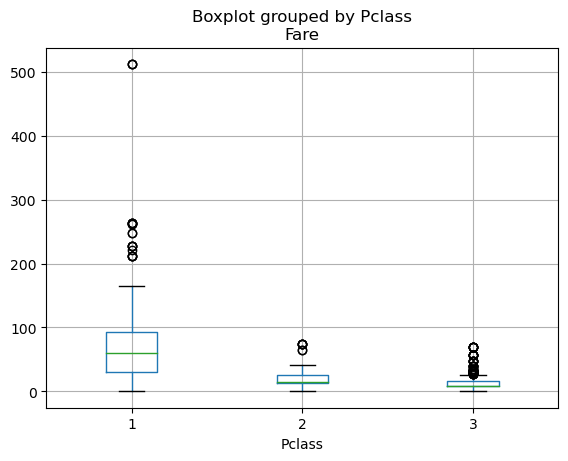

In [96]:
titanic.boxplot(column = 'Fare', by = 'Pclass')

### **Operaciones de `string`**

In [97]:
nombres = pd.Series(['peter Jones', 'Paul', None, 'MARY', 'gUIDO'])
nombres

0    peter Jones
1           Paul
2           None
3           MARY
4          gUIDO
dtype: object

In [98]:
nombres.str.capitalize()

0    Peter jones
1           Paul
2           None
3           Mary
4          Guido
dtype: object

In [99]:
nombres.str.lower()

0    peter jones
1           paul
2           None
3           mary
4          guido
dtype: object

In [100]:
nombres.str.len()

0    11.0
1     4.0
2     NaN
3     4.0
4     5.0
dtype: float64

In [101]:
nombres.str.startswith('P') # Case sensitive.

0    False
1     True
2     None
3    False
4    False
dtype: object

In [102]:
nombres.str.capitalize().str.startswith('P')

0     True
1     True
2     None
3    False
4    False
dtype: object

In [103]:
nombres.str.lower().str.startswith('p') # Alternativa.

0     True
1     True
2     None
3    False
4    False
dtype: object

In [104]:
nombres.str.split()

0    [peter, Jones]
1            [Paul]
2              None
3            [MARY]
4           [gUIDO]
dtype: object

También, se puede utilizar una expresión regular (regex) junto con los siguientes métodos de Pandas (se usa el formato: método | descripción):

* `match`    | Llama a `re.match` para cada elemento, devolviendo un booleano.

* `extract`  | Llama a `re.match` para cada elemento, devolviendo grupos emparejados como cadenas de caracteres.
* `findall`  | Llama a `re.findall` para cada elemento.
* `replace`  | Reemplaza ocurrencias de un patrón con alguna otra cadena de caracteres.
* `contains` | Llama a `re.search` para cada elemento, devolviendo un booleano.
* `count`    | Cuenta las ocurrencias de un patrón.
* `split`    | Equivalente a `str.split` pero acepta una regex.
* `rsplit`   | Equivalente a `str.rsplit` pero acepta una regex.

Para saber más sobre `rsplit`, la siguiente página puede ser útil: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rsplit.html.

A su vez, al construir una regex, la siguiente herramienta suele ser muy útil: https://regex101.com/r/ry8aTb/1. Asegurarse de seleccionar el lenguaje deseado en la columna de la izquierda; por ejemplo, `Python`.

Otros métodos de Pandas para datos de tipo `string` incluyen (se sigue usando el formato: método | descripción):

* `get`           | Indexa cada elemento.

* `slice`         | Corta cada elemento.
* `slice_replace` | Reemplaza la porción en cada elemento con el valor pasado.
* `cat`           | Concatena `strings`.
* `repeat`        | Repite valores.
* `normalize`     | Devuelve la versión en Unicode de los `strings`.
* `pad`           | Agrega espacios en blanco a izquierda, derecha o ambos lados de los `strings`.
* `wrap`          | Divide `strings` largos en líneas con longitud menor a la dada.
* `join`          | Une los `strings` en cada elemento de la `Series` con el separador dado.
* `get_dummies`   | Extrae variables dicotómicas como un `DataFrame`.

In [105]:
nombres.str.lower().str.get_dummies(' ')

,guido,jones,mary,paul,peter
0,0,1,0,0,1
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


### **Fechas y horas**

In [106]:
fecha = pd.to_datetime('31st of July, 2023')
fecha

Timestamp('2023-07-31 00:00:00')

In [107]:
fecha.strftime('%A')

'Monday'

Para conocer todos los códigos como `%A` disponibles, la siguiente página puede ser muy útil: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes.

In [108]:
pd.date_range('2023-08-01', '2023-08-07')

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-05', '2023-08-06', '2023-08-07'],
              dtype='datetime64[ns]', freq='D')

In [109]:
pd.date_range('2023-08-01', periods = 7) # Alternativa.

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-05', '2023-08-06', '2023-08-07'],
              dtype='datetime64[ns]', freq='D')

In [110]:
pd.date_range('2023-08-01', periods = 7, freq = 'H')

DatetimeIndex(['2023-08-01 00:00:00', '2023-08-01 01:00:00',
               '2023-08-01 02:00:00', '2023-08-01 03:00:00',
               '2023-08-01 04:00:00', '2023-08-01 05:00:00',
               '2023-08-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')